# Student Grade Prediction Project
## Math Grade
> Reference: https://www.kaggle.com/code/othmanshbeir/student-grade-prediction-accuracy-95-97/notebook

#### Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    LogisticRegression,
    BayesianRidge,
)
import sklearn.tree

## Read File and Make Basic Observation

In [3]:
df = pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [4]:
df.shape

(395, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

#### Display Numerical Attribute

In [6]:
numerical_col = df.select_dtypes(include='int64').columns.to_list()
print("Number of Categorical Attributes:", len(numerical_col))
print("Attributes:", numerical_col)

Number of Categorical Attributes: 16
Attributes: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [7]:
categorical_col = df.select_dtypes(include='object').columns.to_list()
print("Number of Categorical Attributes:", len(categorical_col))
print("Attributes:", categorical_col)

Number of Categorical Attributes: 17
Attributes: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


##### Basic Statistics of Each Attribute
Numerical

In [8]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Categorical

In [9]:
df.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


### Data Analysis

Comparative Distribution of all Attributes

<Figure size 600x400 with 0 Axes>

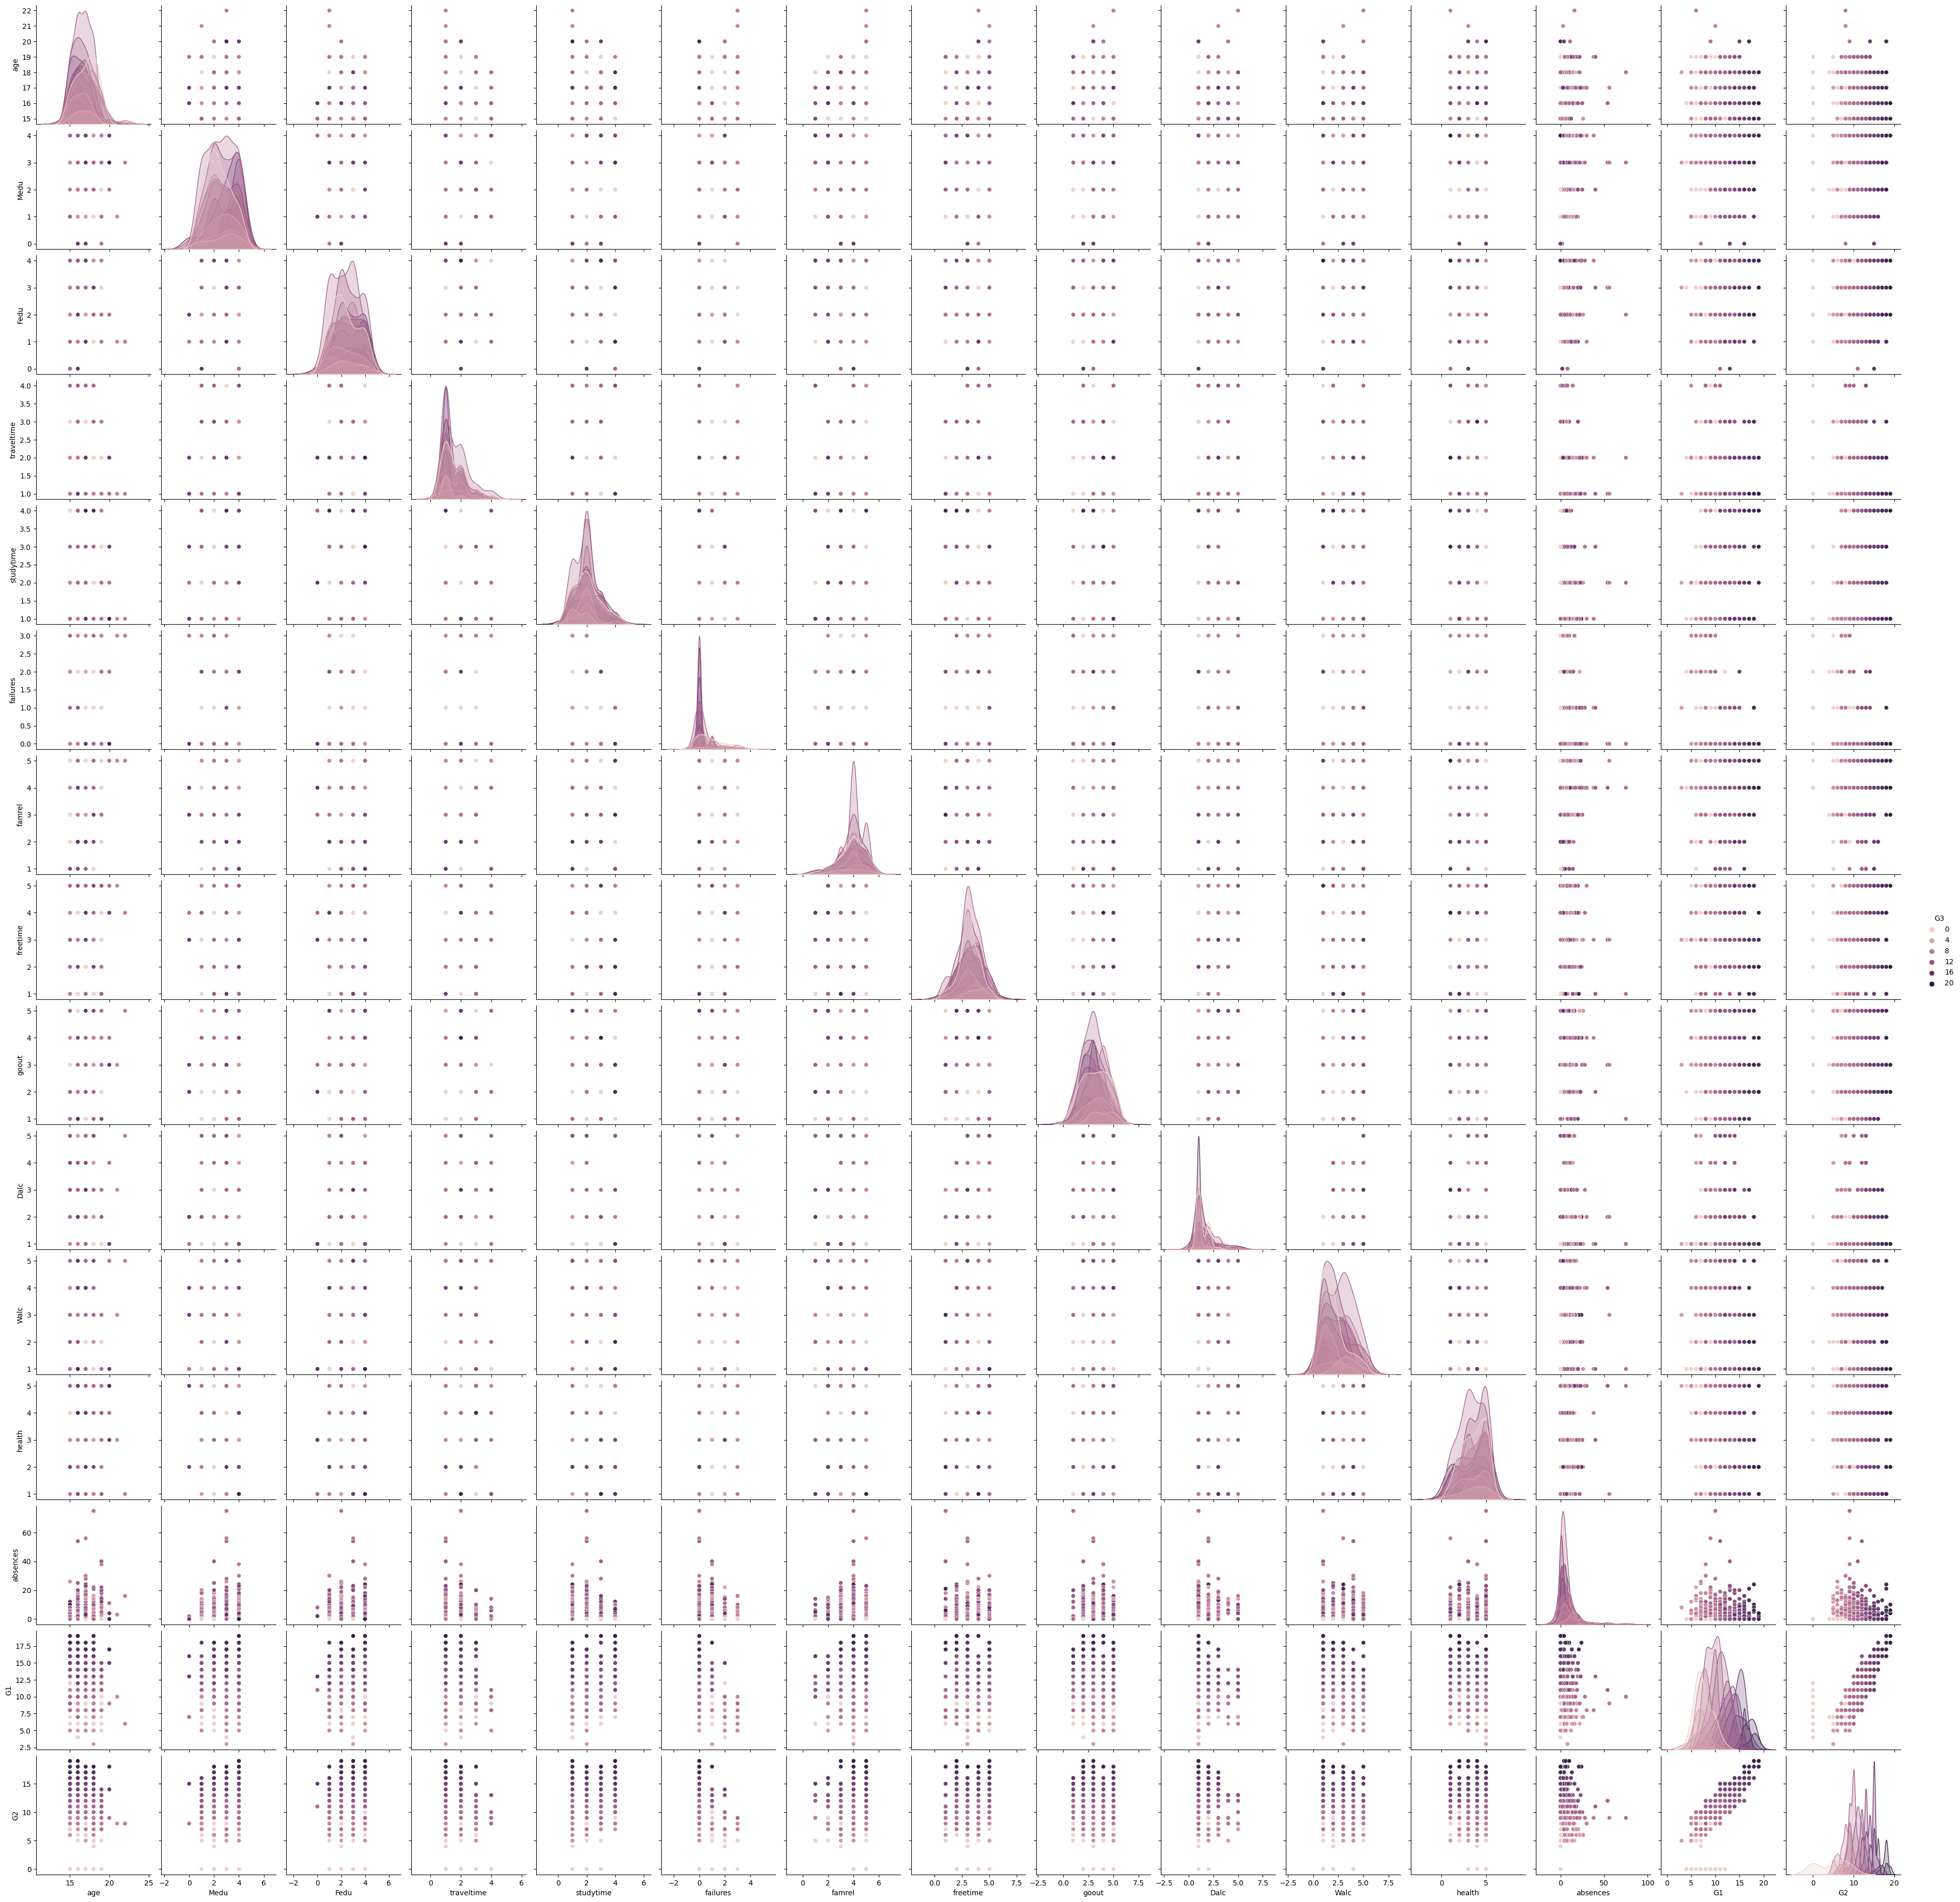

In [10]:
plt.figure(figsize=(6, 4))
sns.pairplot(df, hue='G3')
plt.show()

Grade Distribution by Grades

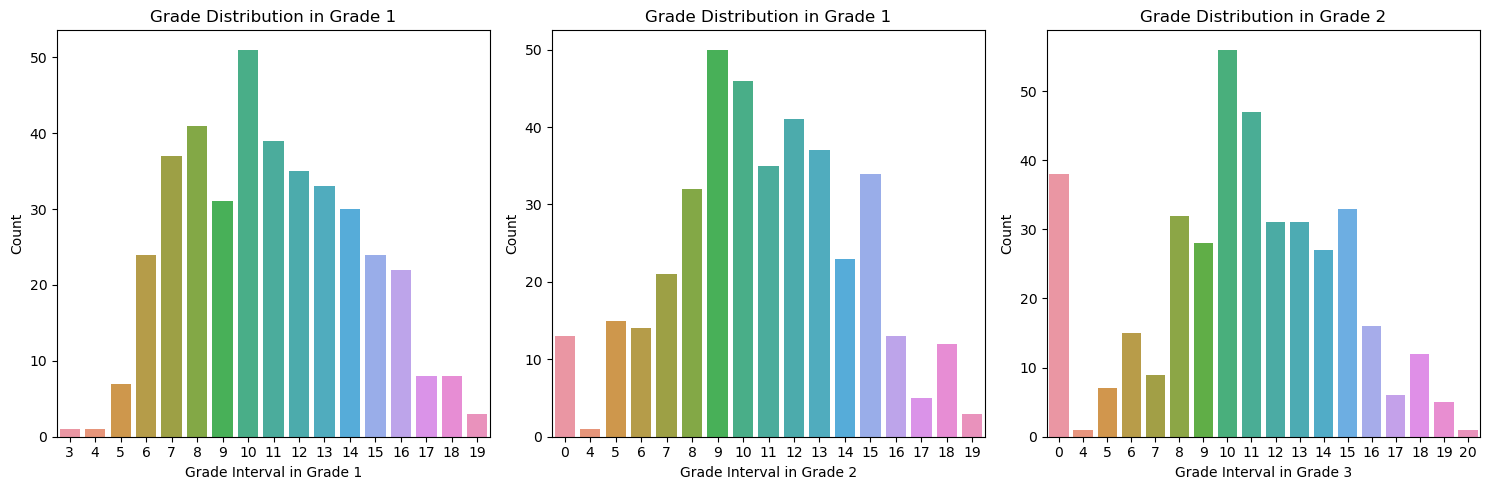

In [11]:
# create a combo of one row, three columns graphs
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

g1 = sns.countplot(data=df, x='G1', ax=axs[0])
g1.set_title('Grade Distribution in Grade 1')
g1.set_xlabel('Grade Interval in Grade 1')
g1.set_ylabel('Count')

g2 = sns.countplot(data=df, x='G2', ax=axs[1])
g2.set_title('Grade Distribution in Grade 1')
g2.set_xlabel('Grade Interval in Grade 2')
g2.set_ylabel('Count')

g3 = sns.countplot(data=df, x='G3', ax=axs[2])
g3.set_title('Grade Distribution in Grade 2')
g3.set_xlabel('Grade Interval in Grade 3')
g3.set_ylabel('Count')

plt.tight_layout()
plt.show()

**Note**: many zero score in the grade 2 
<br>
<br>

We need to check null or empty value

Text(0.5, 1.0, 'Missing Values in the Data')

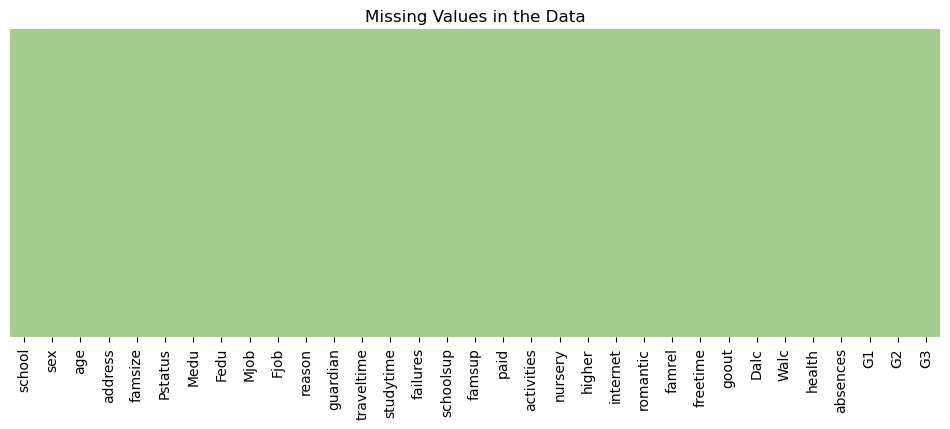

In [12]:
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='crest')
plt.title('Missing Values in the Data')

From the above graph, we know that there is no missing value. Many 0s may have other causes of absence from exams.

## School's Influence on Students' Grade

In [13]:
# find schools of students
df['school'].unique()

array(['GP', 'MS'], dtype=object)

### School Distribution

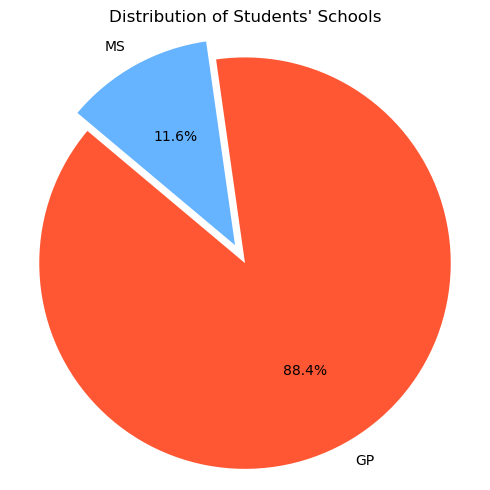

In [14]:
# Calculate two school's percentage
total = len(df)
value_counts = df['school'].value_counts()
percentages = value_counts / total * 100

# Define colors for pie plot
custom_colors = ['#ff5733', '#66b3ff']  # A vibrant red and a bright blue

# explode count, separate two sections
explode = (0.1, 0)

plt.figure(figsize=(5, 5))
plt.pie(
    percentages,
    explode=explode,
    colors=custom_colors,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140,
    labels=value_counts.index
)

plt.axis('equal')
plt.title("Distribution of Students' Schools")
plt.tight_layout()

plt.show()

### Grade Distribution with respect to School

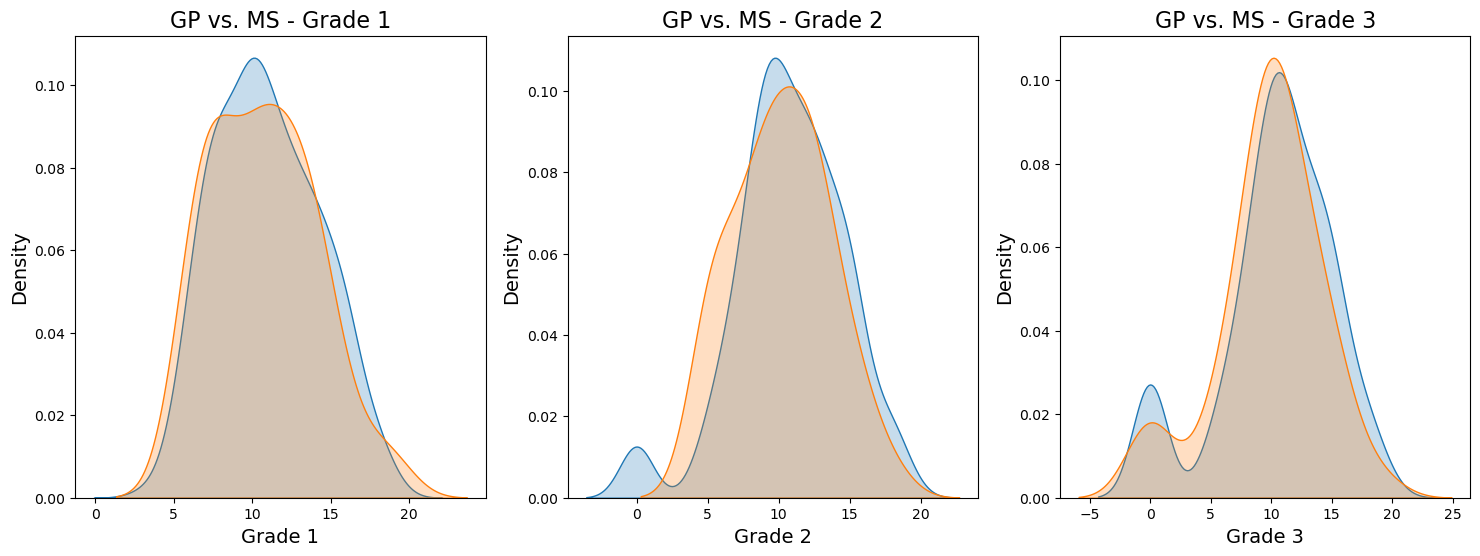

In [15]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grade distribution by school for G1
sns.kdeplot(df.loc[df['school'] == 'GP', 'G1'], label='GP', fill=True, ax=axs[0])
sns.kdeplot(df.loc[df['school'] == 'MS', 'G1'], label='MS', fill=True, ax=axs[0])
axs[0].set_title('GP vs. MS - Grade 1', fontsize=16)
axs[0].set_xlabel('Grade 1', fontsize=14)
axs[0].set_ylabel('Density', fontsize=14)

sns.kdeplot(df.loc[df['school'] == 'GP', 'G2'], label='GP', fill=True, ax=axs[1])
sns.kdeplot(df.loc[df['school'] == 'MS', 'G2'], label='MS', fill=True, ax=axs[1])
axs[1].set_title('GP vs. MS - Grade 2', fontsize=16)
axs[1].set_xlabel('Grade 2', fontsize=14)
axs[1].set_ylabel('Density', fontsize=14)

sns.kdeplot(df.loc[df['school'] == 'GP', 'G3'], label='GP', fill=True, ax=axs[2])
sns.kdeplot(df.loc[df['school'] == 'MS', 'G3'], label='MS', fill=True, ax=axs[2])
axs[2].set_title('GP vs. MS - Grade 3', fontsize=16)
axs[2].set_xlabel('Grade 3', fontsize=14)
axs[2].set_ylabel('Density', fontsize=14)

plt.show()

**Note:** we can see that the school does not has significant influence on grade


#### Final Grade and Gender Relationship

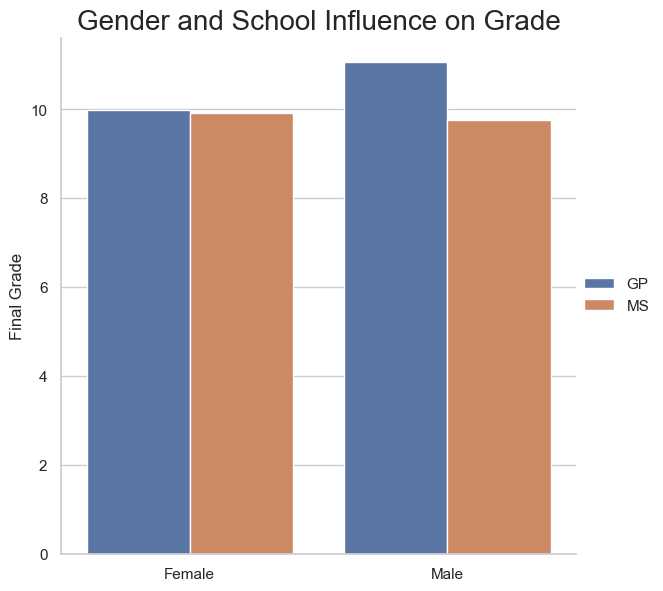

In [13]:
custom_colors = ['#99e0f7', '#a34624']  # You can change these colors as desired
sns.set_theme(style="whitegrid")

fig = sns.catplot(
    data=df, kind='bar',
    x='sex', y='G3', hue='school',
    errorbar=None, height=6
)
custom_xtitles = ["Female", "Male"]
fig.set_xticklabels(custom_xtitles)
fig.set_axis_labels("", "Final Grade")
fig.legend.set_title('')

plt.title("Gender and School Influence on Grade", fontsize=20)
plt.show()

### Student Age Distribution

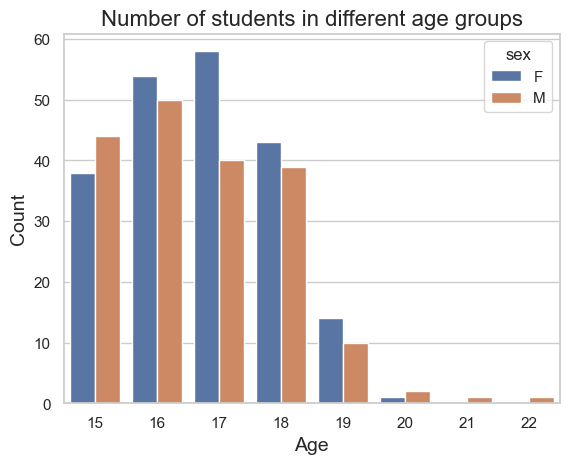

In [17]:
sns.countplot(data=df, x='age', hue='sex')
plt.title('Number of students in different age groups', fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

### Percentage of Urban and Rural Students

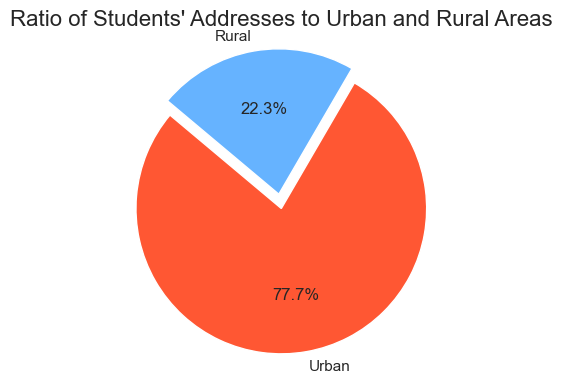

In [24]:
# Calculate two school's percentage
total = len(df)
value_counts = df['address'].value_counts()
percentages = value_counts / total * 100

# Define colors for pie plot
custom_colors = ['#ff5733', '#66b3ff']  # A vibrant red and a bright blue

# explode count, separate two sections
explode = (0.1, 0)

plt.figure(figsize=(4, 4))
plt.pie(
    percentages,
    explode=explode,
    colors=custom_colors,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140,
    labels=['Urban', 'Rural']
)

plt.axis('equal')
plt.title("Ratio of Students' Addresses to Urban and Rural Areas", fontsize=16)
plt.tight_layout()

plt.show()

We can see that most students are urban

### Do living in Urban or Rural regions affect the grade?

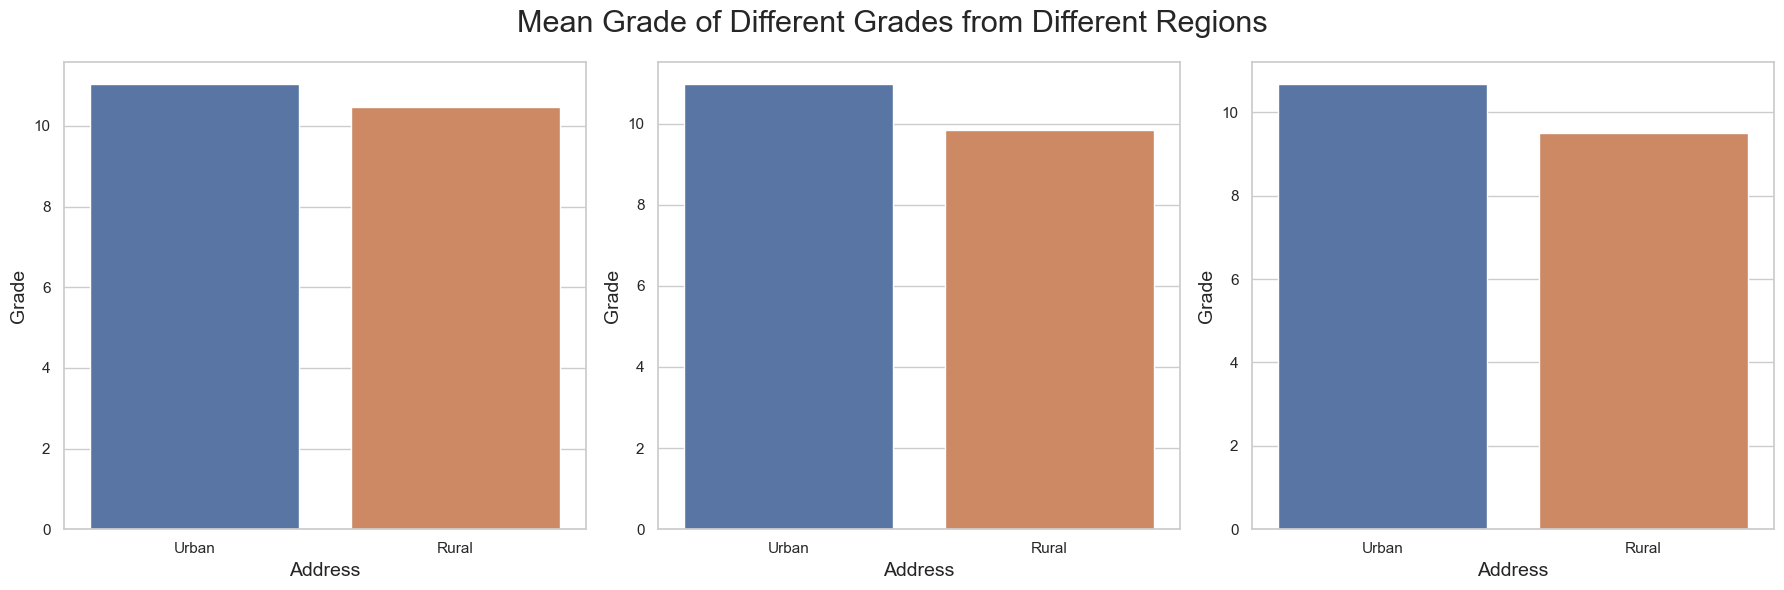

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=df, x=df['address'], y=df['G1'], errorbar=None, ax=axs[0])
axs[0].set_xlabel('Address', fontsize=14)
axs[0].set_ylabel('Grade', fontsize=14)
axs[0].set_xticklabels(['Urban','Rural'])

sns.barplot(data=df, x='address', y='G2', errorbar=None, ax=axs[1])
axs[1].set_xlabel('Address', fontsize=14)
axs[1].set_ylabel('Grade', fontsize=14)
axs[1].set_xticklabels(['Urban','Rural'])

sns.barplot(data=df, x='address', y='G3', errorbar=None, ax=axs[2])
axs[2].set_xlabel('Address', fontsize=14)
axs[2].set_ylabel('Grade', fontsize=14)
axs[2].set_xticklabels(['Urban','Rural'])

fig.suptitle('Mean Grade of Different Grades from Different Regions', fontsize=22)
plt.tight_layout()
plt.show()

From graph above, we can conclude that students from urban area scores higher in average.

### Relationship between Reason to Choose School and Final Grade

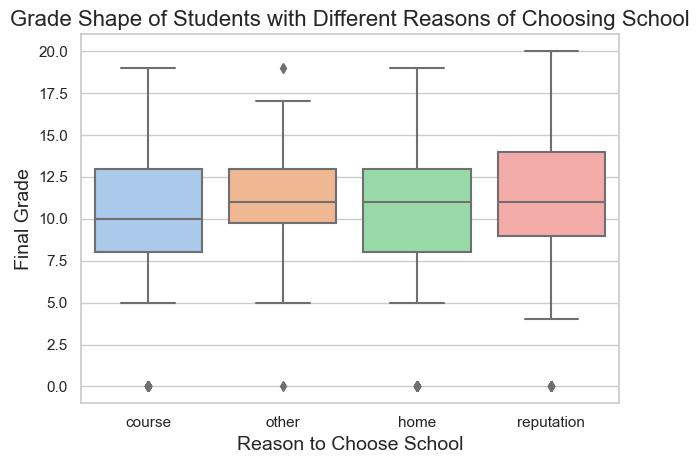

In [30]:
sns.boxplot(x=df['reason'], y=df['G3'], palette='pastel')

plt.title('Grade Shape of Students with Different Reasons of Choosing School', fontsize=16)
plt.xlabel('Reason to Choose School', fontsize=14)
plt.ylabel('Final Grade', fontsize=14)
plt.tight_layout()
plt.show()

From the graph, we can see that students choosing school by reputation has the highest upper value, upper quantile and median (though highest median is shared). Students who choose school by other reasons has the most concentrating grade distribution.

### Relationship between Family Size and Final Grade 

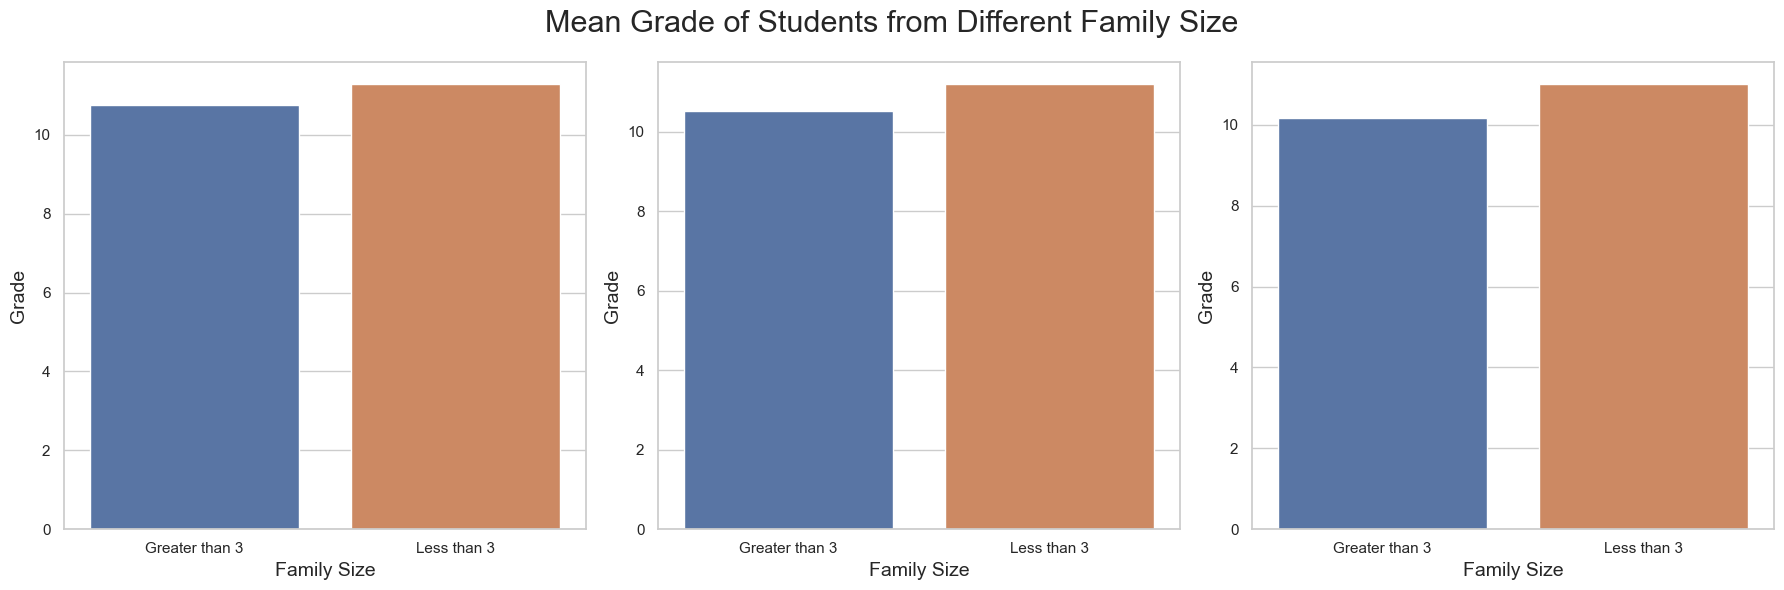

In [43]:
fig, axs = plt.subplots(1,3, figsize=(18,6))

sns.barplot(data=df, x='famsize', y='G1', errorbar=None, ax=axs[0])
sns.barplot(data=df, x='famsize', y='G2', errorbar=None, ax=axs[1])
sns.barplot(data=df, x='famsize', y='G3', errorbar=None, ax=axs[2])

for i in range(3):
    axs[i].set_xlabel('Family Size', fontsize=14)
    axs[i].set_ylabel('Grade', fontsize=14)
    axs[i].set_xticklabels(['Greater than 3', 'Less than 3'])

fig.suptitle('Mean Grade of Students from Different Family Size', fontsize=22)
plt.tight_layout()
plt.show()

From the graph, we can see that students from family with less than 3 members tend to perform better in all grades

### Relationship between Parents' Cohabituation and Grade

### Relationship between Father's Education and Grade

### Relationship between Mother' Education and Grade